## Prevendo a Popularidade das Músicas

### Importando os pacotes

In [12]:
import os
import sys
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv('CODE_PATH'))

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import config, custom_funcs

sns.set_style('whitegrid')
sns.set_theme('notebook')
pd.set_option('display.precision',2)

### Importando os Dados

In [13]:
df = pd.read_csv(config.best_songs,sep=';')
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [14]:
# Observando se os nomes das colunas estão sem espaços

df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy',
       'danceability ', 'dB', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness ', 'popularity'],
      dtype='object')

Visto que as colunas *'danceability'* e *'speechiness'* tem um espaço no início e no fim, estarei utilizando a função strip para realizar a limpeza dos nomes.

In [15]:
df.columns = df.columns.str.strip()

In [16]:
list = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'liveness',
    'valence',
    'popularity']

In [17]:
num_df = df[list].copy()
num_df.head()

,danceability,energy,speechiness,acousticness,liveness,valence,popularity
0,71,68,7,6,3,65,98
1,78,59,3,44,35,73,97
2,77,64,14,74,17,53,96
3,70,81,5,25,25,86,96
4,72,62,5,42,8,17,96


In [18]:
X_train, X_test, y_train, y_test = train_test_split(num_df.iloc[:,:-1],num_df.iloc[:,-1],test_size=0.3,random_state=42)

In [19]:
train_data = X_train.join(y_train)

### Exploratory Data Analysis

In [20]:
train_data.describe()

,danceability,energy,speechiness,acousticness,liveness,valence,popularity
count,1669.00,1669.00,1669.00,1669.00,1669.00,1669.00,1669.00
mean,67.04,69.81,10.34,15.70,17.89,53.88,70.40
std,13.81,16.34,9.80,20.47,13.50,22.43,11.48
min,18.00,11.00,2.00,0.00,2.00,4.00,5.00
25%,59.00,59.00,4.00,2.00,9.00,37.00,64.00
50%,68.00,72.00,6.00,7.00,13.00,53.00,71.00
75%,76.00,82.00,13.00,22.00,23.00,72.00,78.00
max,98.00,100.00,58.00,98.00,84.00,97.00,98.00


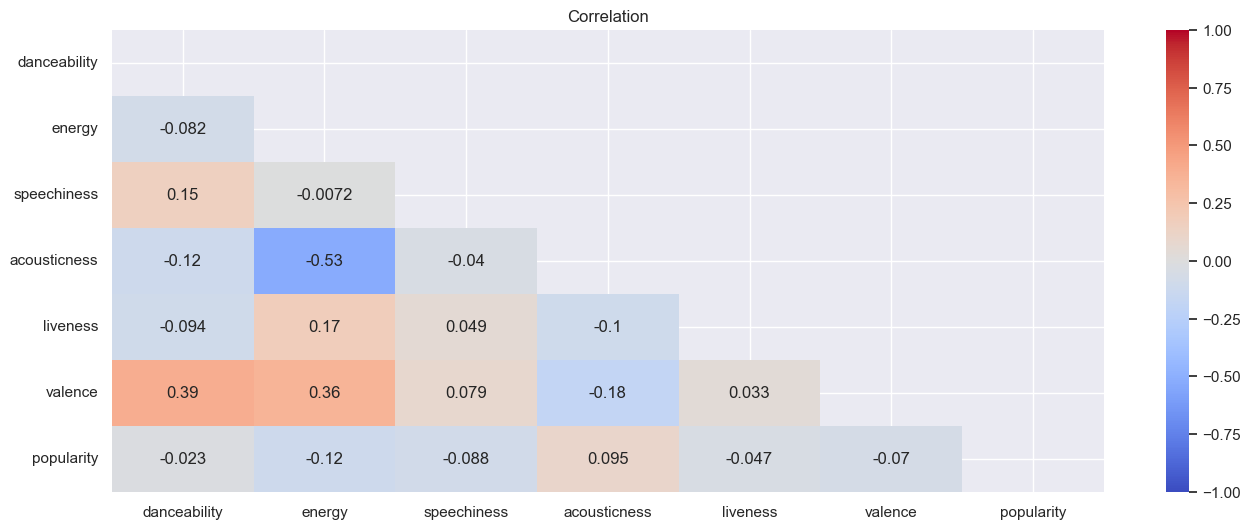

In [21]:
custom_funcs.corr_matrix(train_data)

In [22]:
# custom_funcs.histogram(train_data,'dB','dB Distribution')

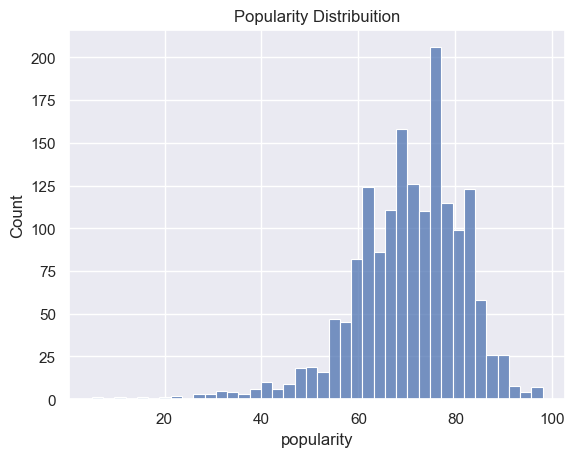

In [23]:
custom_funcs.histogram(train_data,'popularity','Popularity Distribuition')

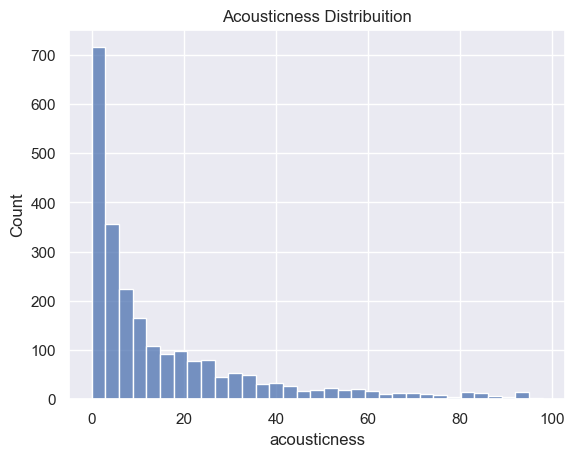

In [24]:
custom_funcs.histogram(df,'acousticness','Acousticness Distribuition')

In [25]:
# custom_funcs.histogram(train_data,'duration','Duration Distribuition')

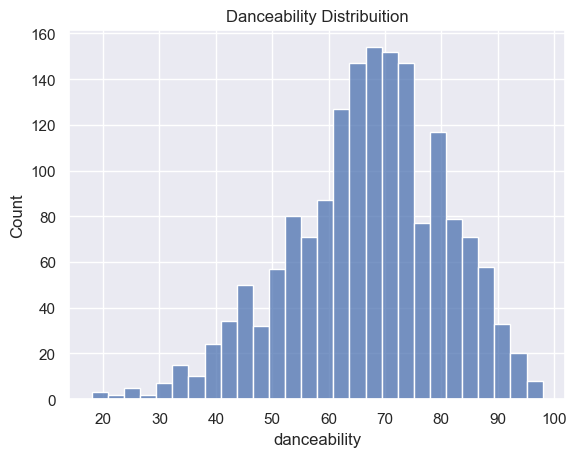

In [26]:
custom_funcs.histogram(train_data,'danceability','Danceability Distribuition')

Valence x Danceability


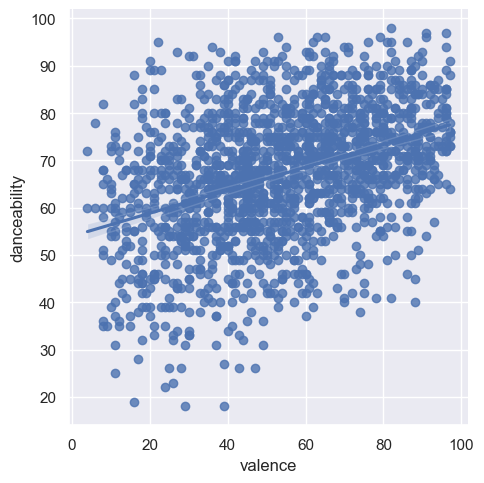

In [27]:
print('Valence x Danceability')
custom_funcs.comparative(train_data,'valence','danceability')

Valence x Energy


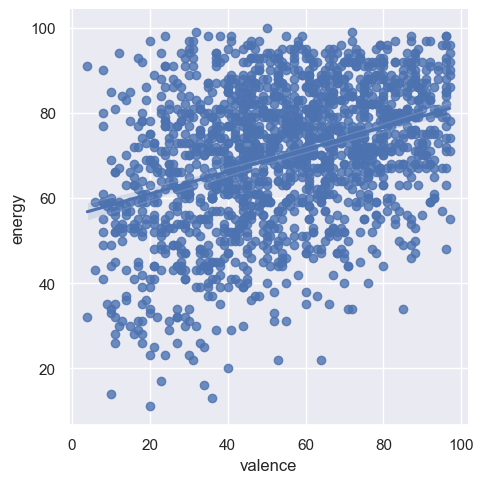

In [28]:
print('Valence x Energy')
custom_funcs.comparative(train_data,'valence','energy')

In [29]:
# print('Popularity x Year')
# _ = custom_funcs.comparative(train_data,'year','popularity')

In [30]:
# plt.title('Duration x Danceability')
# _ = sns.scatterplot(data=train_data,x='danceability',y='duration')

In [31]:
# plt.title('dB x Energy')
# _ = sns.scatterplot(data=train_data,x='dB',y='energy')

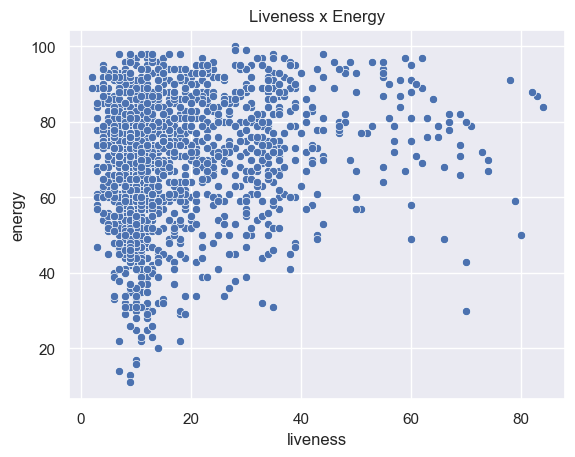

In [32]:
plt.title('Liveness x Energy')
_ = sns.scatterplot(data=train_data,x='liveness',y='energy')

### Preparing Data to Model

In [33]:
train_data.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence', 'popularity'],
      dtype='object')

In [34]:
X_train.iloc[:,3]

686      1
2021     9
1359     1
305      5
209     32
        ..
1638    21
1095     2
1130    23
1294     4
860      5
Name: acousticness, Length: 1669, dtype: int64

In [35]:
X_train.iloc[:,1]

686     87
2021    69
1359    77
305     73
209     70
        ..
1638    65
1095    61
1130    61
1294    83
860     65
Name: energy, Length: 1669, dtype: int64

In [36]:
df['acousticness'].describe()

count    2385.00
mean       15.61
std        20.28
min         0.00
25%         2.00
50%         7.00
75%        22.00
max        98.00
Name: acousticness, dtype: float64

### Training Model

In [37]:
rf = RandomForestRegressor(random_state=42)

In [38]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [39]:
pred = rf.predict(X_test)

In [40]:
mean_absolute_error(y_test,pred).round(2)

9.0

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
import optuna
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


def objective(trial):
    # Define os hiperparâmetros para otimização
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Cria e treina o modelo com os hiperparâmetros sugeridos pelo Optuna
    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    model.fit(X_train, y_train)

    # Calcula a métrica de erro no conjunto de teste
    y_pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, y_pred)

    return mse


def optimize():
    # Define o estudo do Optuna
    study = optuna.create_study(direction="minimize")

    # Inicia a otimização dos hiperparâmetros
    study.optimize(objective, n_trials=100)

    # Obtém os melhores hiperparâmetros e o menor valor da métrica
    best_params = study.best_params
    best_value = study.best_value

    print("Melhor valor da métrica:", best_value)
    print("Melhores hiperparâmetros:", best_params)


if __name__ == "__main__":
    optimize()

[I 2023-07-04 19:52:18,006] A new study created in memory with name: no-name-9c25a949-9c9e-4e97-9b83-07c428edd895
[I 2023-07-04 19:52:19,721] Trial 0 finished with value: 9.665172928470158 and parameters: {'learning_rate': 0.057664431829827834, 'n_estimators': 600, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 9.665172928470158.
[I 2023-07-04 19:52:21,063] Trial 1 finished with value: 8.966507133746099 and parameters: {'learning_rate': 0.016396271035811344, 'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 1 with value: 8.966507133746099.
[I 2023-07-04 19:52:23,908] Trial 2 finished with value: 9.32570986601093 and parameters: {'learning_rate': 0.01646352450135829, 'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 1 with value: 8.966507133746099.
[I 2023-07-04 19:52:24,386] Trial 3 finished with value: 8.89272703504531 and parameters: {'learni

Melhor valor da métrica: 8.634933547447655
Melhores hiperparâmetros: {'learning_rate': 0.01434632525023883, 'n_estimators': 400, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3}


In [45]:
model = GradientBoostingRegressor(
    learning_rate=0.01434632525023883,
    n_estimators=400,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=3,
    random_state=42,
    )

In [46]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01434632525023883, min_samples_leaf=3,
                          min_samples_split=10, n_estimators=400,
                          random_state=42)

### Saving Model

In [48]:
# with open('reg_2_1.pkl','wb') as file:
#      pickle.dump(model,file)

In [38]:
X_train.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence'],
      dtype='object')